<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [58]:
#Importation de la librairie Pandas
import pandas as pd
import matplotlib.pyplot as plt
import chardet

In [59]:
#Importation de la librairie plotly express
import plotly.express as px 

In [ ]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [60]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
df_web.head()
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")
df_erp.head()
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")
df_liaison.head()


C:\Users\33666\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\33666\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\33666\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements du fichiers csv</h3>
</div>

<div style="color: RGB(255,114,0)">
<h3>Information Mentor</h3>
L'étudiant va être très certainement confronté à des difficultés pour ouvrir ce fichier.
Il faudra donc qu'il se documente sur les points suivants:<br>
- notion d'encodage en informatique. ("UTF-8", "ISO-8859-1", etc)<br>
- manipulation de fichier csv, tsv, etc<br>
<br>
Pour lui faire réussir cette étape, l'étudiant devrait suivre ces directives:<br>
- Explorer le fichier à l'aide d'un outil comme Notepad++ afin de visualiser la structure du fichier<br>
- ... ou d'utiliser Excel pour les mêmes raisons. Mais dans ce cas l'étudiant pourrait être tenté de convertir le fichier csv en xlsx, ce que je ne recommande pas: si le fichier est trop gros pour Excel cela deviendra une souffrance de procéder ainsi<br>
- apprendre à ourvrir un fichier avec python à l'aide de l'instruction suivante: <code>with open(nom_fichier, "rb") as f: </code><br>
- utiliser une bibliothèque comme <code>chardet</code> pour tenter d'identifier l'encodage du fichier<br>
</div>

In [61]:
#Avant d'utiliser pandas pour le chargement du fichier, explorons la structure du fichier
#Pour cela utilisons l'instruction ci-dessous qui permet d'ouvrir un fichier texte
with open("caracteristiques_vins.csv", "rb") as f:
    file = f.read()
    
#Et affichons le:
print(file)

b"post_name;poids;R\xe9gion;Domaine;Appellation;Couleur;C\xe9page;Mill\xe9sime;Garde;Contenance;Degr\xe9 d'alcool;Temp\xe9rature d\xe9gustation;Alliance mets\r\npierre-jean-villa-saint-joseph-preface-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Saint Joseph;Rouge;100% Syrah;2020;4-7 ans;75cl;13%;15\xb0C;Charcuterie, Lapin, Viande rouge, Volaille\r\npierre-jean-villa-saint-joseph-tilde-2017;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Saint Joseph;Rouge;100% Syrah;2019;6-8 ans;75cl;13%;15\xb0C;Charcuterie, Viande rouge, Volaille\r\npierre-jean-villa-croze-hermitage-accroche-coeur-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Crozes-Hermitage;Rouge;100% Syrah;2020;3-5 ans;75cl;13%;15\xb0C;Viande rouge, Volaille\r\npierre-jean-villa-igp-gamine-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Collines Rhodaniennes;Rouge;100% Syrah;2020;3-5 ans;75cl;13%;14\xb0C;Charcuterie, Viande rouge, Volaille\r\npierre-jean-villa-cote-rotie-carmina-2017;1.5 kg;Rh\xf4ne;Pierre Jean Villa;C\xf4te R\xf4tie;Rouge;100% Syrah;2019;10-20 ans;7

In [62]:
#Vous avez dû constater que les champs sont séparées par des point-virgule

#tentons d'ouvrir le fichier avec pandas avec cet élément
df_caracteristiques = pd.read_csv("caracteristiques_vins.csv", sep=";")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 17: invalid continuation byte

Nous obtenons une erreur, elle est de type <code>UnicodeDecodeError</code><br>
Celle-ci semble être liée à l'encodage du fichier<br>
Utilisons la bibliothèque <code>chardet</code> pour tenter d'identifier l'encodage du fichier

In [63]:
#Importation de la bibilothèque 
#(à noter que c'est une mauvaise pratique d'importer une bibliothèque au milieu d'un programme)
#(celle-ci doit toujours figurer au début du script)
import chardet

Rendez-vous sur le lien ci-après pour identifier l'instruction dont vous aurez besoin:<br>
https://chardet.readthedocs.io/en/latest/usage.html#basic-usage

In [64]:
#Identification de l'encodage du fichier
chardet.detect(file)


{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [65]:
#A présent que nous connaissons les séparateurs et l'encodage du fichier
#Utilisons Pandas pour charger le fichier
#Je vous laisse le soin de renseigner les champs manquants
nom_du_fichier = "caracteristiques_vins.csv"
type_de_separateur = ";"
encodage_du_fichier_csv = "Windows-1252"

df_caracteristiques = pd.read_csv(nom_du_fichier, sep=type_de_separateur, encoding=encodage_du_fichier_csv)
df_caracteristiques.head()

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,pierre-jean-villa-saint-joseph-preface-2018,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,pierre-jean-villa-saint-joseph-tilde-2017,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,pierre-jean-villa-croze-hermitage-accroche-coe...,1.5 kg,Rhône,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
3,pierre-jean-villa-igp-gamine-2018,1.5 kg,Rhône,Pierre Jean Villa,Collines Rhodaniennes,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille"
4,pierre-jean-villa-cote-rotie-carmina-2017,1.5 kg,Rhône,Pierre Jean Villa,Côte Rôtie,Rouge,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge"


In [139]:
#exporter caracteristiques
df_caracteristiques.to_csv('df_caracteristiques.csv', index=False)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [66]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 5 colonne(s)


In [67]:
#Consulter le nombre de colonnes
nombre_colonne=df_erp.shape[1]
print("nombre de colonne de la table erp =", nombre_colonne)

#La nature des données dans chacune des colonnes

type_donnees=df_erp.dtypes
print(type_donnees)

#Le nombre de valeurs présentes dans chacune des colonnes

nombre_valeur_colonne=df_erp.count()
print( nombre_valeur_colonne)

#Valeurs manquantes
df_erp.isnull().sum()


nombre de colonne de la table erp = 5
product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object
product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
dtype: int64


product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [68]:
#Afficher les 5 premières lignes de la table
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [69]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
df_erp.loc[df_erp[['product_id']].duplicated(keep=False),:]
colonne_produit_id='product_id'
doublons_erp=df_erp.duplicated(subset=[colonne_produit_id], keep=False)
print(df_erp[doublons_erp])

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status]
Index: []


In [70]:
#Afficher les valeurs distinctes de la colonne stock_status
nom_de_colonne_st_stock='stock_status'
valeurs_distinctes=df_erp[nom_de_colonne_st_stock].unique()
print('les valeurs distinctes de la colonne stock_status sont :', valeurs_distinctes)
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
groupes=df_erp.groupby(nom_de_colonne_st_stock)
colonnes_unique_par_groupe=groupes.apply(lambda groupe: groupe.nunique()==1)
colonnes_avec_valeurs_unique=colonnes_unique_par_groupe.columns[colonnes_unique_par_groupe.all()]
print(colonnes_avec_valeurs_unique)

les valeurs distinctes de la colonne stock_status sont : ['outofstock' 'instock']
Index(['stock_status'], dtype='object')


In [71]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp['stock_status_2']=df_erp['stock_quantity'].apply(lambda quantite: "outofstock" if quantite==0 else "instock")
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,stock_status_2
0,3847,1,24.2,0,outofstock,outofstock
1,3849,1,34.3,0,outofstock,outofstock
2,3850,1,20.8,0,outofstock,outofstock
3,4032,1,14.1,0,outofstock,outofstock
4,4039,1,46.0,0,outofstock,outofstock


In [72]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0      True
1      True
2      True
3      True
4      True
       ... 
820    True
821    True
822    True
823    True
824    True
Length: 825, dtype: bool

In [74]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
df_erp["resultat_diff_st_stock"] =df_erp["stock_status"] == df_erp["stock_status_2"]
df_erp["resultat_diff_st_stock"] =df_erp["resultat_diff_st_stock"].astype(int)
effectifs_diff=df_erp["resultat_diff_st_stock"].value_counts()
print("effectif des True =", effectifs_diff[1])
print("effectif des False =", effectifs_diff[0])

effectif des True = 824
effectif des False = 1


In [75]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
df_erp.loc[df_erp['resultat_diff_st_stock'] == 0, :]

,product_id,onsale_web,price,stock_quantity,stock_status,stock_status_2,resultat_diff_st_stock
443,4954,1,25.0,0,instock,outofstock,0


In [76]:
#Corriger la ou les données incohérentes

df_erp.loc[df_erp['resultat_diff_st_stock'] == 0, 'stock_status']="outofstock"
df_erp.loc[df_erp['resultat_diff_st_stock'] == 0, :]


,product_id,onsale_web,price,stock_quantity,stock_status,stock_status_2,resultat_diff_st_stock
443,4954,1,25.0,0,outofstock,outofstock,0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [77]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
df_erp.loc[df_erp['price'] < 1, :]



,product_id,onsale_web,price,stock_quantity,stock_status,stock_status_2,resultat_diff_st_stock


In [78]:
#Afficher le ou les prix non renseignés dans la colonne "price"
prix_non_renseignes = df_erp.loc[df_erp['price'].isnull()]
print(prix_non_renseignes)

print("Nombres d'article avec un prix non renseignés: {}".format(0)) #Saisir l'instruction manquante dans la fonction format


Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, stock_status_2, resultat_diff_st_stock]
Index: []
Nombres d'article avec un prix non renseignés: 0


In [79]:
#Afficher le prix minimum de la colonne "price"
prix_min = df_erp['price'].min()
#Afficher le prix maximum de la colonne "price"
prix_max = df_erp['price'].max()

print("le prix minimum =", prix_min)
print("le prix maximum =", prix_max )

le prix minimum = 5.2
le prix maximum = 225.0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [80]:
#######################
### stock_quantity  ###
#######################


#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
stock_quantity_min = df_erp['stock_quantity'].min()

#Afficher la quantité maximum de la colonne "stock_quantity"
stock_quantity_max = df_erp['stock_quantity'].max()

print("le stock minimum =", stock_quantity_min)
print("le stock maximum =", stock_quantity_max)


le stock minimum = 0
le stock maximum = 578


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [81]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?717 articles sont en vente en ligne
effectifs_onsale_web = df_erp["onsale_web"].value_counts()
print(effectifs_onsale_web )

1    717
0    108
Name: onsale_web, dtype: int64


In [ ]:
#Quelles sont les colonnes à conserver selon vous?product_id, onsale_web, price, stock_status_2


In [82]:
#Supprimer les colonnes comportant le libellé "stock_status"
#Cette colonne est redondante avec la colonne "stock_quantity". Dans notre projet cette information n'est pas utile.
df_erp_2=df_erp.drop(['stock_status', 'stock_quantity', 'resultat_diff_st_stock'], axis=1)
df_erp_2.head()

,product_id,onsale_web,price,stock_status_2
0,3847,1,24.2,outofstock
1,3849,1,34.3,outofstock
2,3850,1,20.8,outofstock
3,4032,1,14.1,outofstock
4,4039,1,46.0,outofstock


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [83]:
#Dimension du dataset
#Nombre d'observations

print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))
df_web.head()


Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 28 colonne(s)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [84]:
#Consulter le nombre de colonnes
nombre_colonne_web=df_web.shape[1]

#La nature des données dans chacune des colonnes
type_donnees_web=df_web.dtypes
print(type_donnees_web)

#Le nombre de valeurs présentes dans chacune des colonnes
nombre_valeur_colonne_web=df_web.count()
print( nombre_valeur_colonne_web)

#Valeurs manquantes
df_web.isnull().sum()


sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [29]:
#Selon vous, quelles sont les colonnes à supprimer? "virtual", "downloadable", "rating_count", "average_rating",
#"tax_class", "post_content", "post_password", "post_content_filtered", "post_parent", "menu_order", "post_mime_type", 
#"comment_count", "post_status", "comment_status","ping_status", "post_type"


In [204]:
###Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web_new=df_web.drop(["virtual", "downloadable", "rating_count", "average_rating", "tax_class", "post_content", 
                        "post_password", "post_content_filtered", "post_parent", "menu_order", "post_mime_type", 
                        "comment_count", "post_status", "comment_status",
                        "ping_status", "post_type"], axis=1)


In [205]:
type_df_web_new=df_web_new.dtypes
print(type_df_web_new)

sku                          object
total_sales                 float64
tax_status                   object
post_author                 float64
post_date            datetime64[ns]
post_date_gmt        datetime64[ns]
post_title                   object
post_excerpt                 object
post_name                    object
post_modified        datetime64[ns]
post_modified_gmt    datetime64[ns]
guid                         object
dtype: object


In [206]:
###Visualisation des valeurs de la colonne sku
df_web_new['sku'] 

0       bon-cadeau-25-euros
1                     15298
2                     15296
3                     15300
4                     19814
               ...         
1508                  16135
1509                  15891
1510                  15887
1511                13127-1
1512                  16230
Name: sku, Length: 1513, dtype: object

In [207]:
###Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?

colonne_a_verifier = 'sku'
valeurs_incorrectes = df_web_new[df_web_new[colonne_a_verifier].astype(str).str.len() > 5]
print(valeurs_incorrectes)

                      sku  total_sales tax_status  post_author  \
0     bon-cadeau-25-euros         10.0    taxable          1.0   
797               13127-1          0.0    taxable          2.0   
1209  bon-cadeau-25-euros         10.0        NaN          1.0   
1511              13127-1          0.0        NaN          2.0   

               post_date       post_date_gmt  \
0    2018-06-01 13:53:46 2018-06-01 11:53:46   
797  2020-06-09 15:42:04 2020-06-09 13:42:04   
1209 2018-06-01 13:53:46 2018-06-01 11:53:46   
1511 2020-06-09 15:42:04 2020-06-09 13:42:04   

                                        post_title  \
0                                Bon cadeau de 25€   
797   Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
1209                             Bon cadeau de 25€   
1511  Clos du Mont-Olivet Châteauneuf-du-Pape 2007   

                                           post_excerpt  \
0     <span style="color: #a85253;"><strong>Parlons ...   
797   Nez gracieux, très élégant avec u

In [208]:
###Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
df_web_new.loc[df_web_new['sku'] == "bon-cadeau-25-euros", :] 


,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid
0,bon-cadeau-25-euros,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...
1209,bon-cadeau-25-euros,10.0,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/wp-content/uploads/...


In [209]:
###Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?

df_web_new.loc[df_web_new['sku'] == "13127-1", :]

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid
797,13127-1,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...
1511,13127-1,0.0,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/wp-content/uploads/...


In [210]:
###remplacer 13127-1 par 13127 et bon-cadeau-25-euros par 99999
df_web_new.loc[df_web_new['sku']=='13127-1', 'sku'] = '13127'
df_web_new.loc[df_web_new['sku']=='bon-cadeau-25-euros', 'sku'] = '99999'

In [211]:
####Identifier les lignes sans code articles
####Les lignes sans code article semble être toutes non renseignés
df_websans_code=df_web_new.loc[df_web_new['sku'].isnull(),:]
print(df_websans_code)

     sku  total_sales tax_status  post_author post_date post_date_gmt  \
178  NaN          NaN        NaN          NaN       NaT           NaT   
179  NaN          NaN        NaN          NaN       NaT           NaT   
227  NaN          NaN        NaN          NaN       NaT           NaT   
230  NaN          NaN        NaN          NaN       NaT           NaT   
231  NaN          NaN        NaN          NaN       NaT           NaT   
..   ...          ...        ...          ...       ...           ...   
792  NaN          NaN        NaN          NaN       NaT           NaT   
793  NaN          NaN        NaN          NaN       NaT           NaT   
794  NaN          NaN        NaN          NaN       NaT           NaT   
795  NaN          NaN        NaN          NaN       NaT           NaT   
796  NaN          NaN        NaN          NaN       NaT           NaT   

    post_title post_excerpt post_name post_modified post_modified_gmt guid  
178        NaN          NaN       NaN         

In [212]:
###Les lignes sans code article semble être toutes non renseignés(suite)
identifiant='sku'
df_web_new_ss=df_web_new.dropna(subset=[identifiant])
df_web_new_ss.isnull().sum()

sku                    0
total_sales            0
tax_status           714
post_author            0
post_date              0
post_date_gmt          0
post_title             0
post_excerpt         714
post_name              0
post_modified          0
post_modified_gmt      0
guid                   0
dtype: int64

In [213]:
####La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?

df_web_new_ss2=df_web_new_ss.loc[df_web_new_ss['tax_status'] == "taxable", :]
df_web_new_ss2.isnull().sum()


sku                  0
total_sales          0
tax_status           0
post_author          0
post_date            0
post_date_gmt        0
post_title           0
post_excerpt         0
post_name            0
post_modified        0
post_modified_gmt    0
guid                 0
dtype: int64

In [214]:
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web_new_ss2.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_web_new_ss2.shape[1]))

Le tableau comporte 714 observation(s) ou article(s)
Le tableau comporte 12 colonne(s)


In [215]:
####exporter la table web sans sku manquant sous csv
df_web_new_ss2.to_csv('webnew_sans_manquant_1.csv', index=False)

In [166]:
df_websans_code
####1 - Créer un dataframe avec uniquement les lignes sans code article
df_websans_code=df_web_new.loc[df_web_new['sku'].isnull(),:]
###2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_websans_code.info()
df_websans_code.head()
####3 - Que constatez-vous? je constate que les valeurs affichées ne sont pas exploitables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 178 to 796
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                0 non-null      object        
 1   total_sales        2 non-null      float64       
 2   tax_status         2 non-null      object        
 3   post_author        2 non-null      float64       
 4   post_date          2 non-null      datetime64[ns]
 5   post_date_gmt      2 non-null      datetime64[ns]
 6   post_title         2 non-null      object        
 7   post_excerpt       2 non-null      object        
 8   post_name          2 non-null      object        
 9   post_modified      2 non-null      datetime64[ns]
 10  post_modified_gmt  2 non-null      datetime64[ns]
 11  guid               2 non-null      object        
dtypes: datetime64[ns](4), float64(2), object(6)
memory usage: 8.6+ KB


,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid
178,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN
179,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN
227,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN
230,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN
231,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN


In [216]:
###recherche de doublons dans la table finale web
colonne_id_vf='sku'
doublons_web_vf=df_web_new_ss2.duplicated(subset=[colonne_id_vf], keep=False)
print(df_web_new_ss2[doublons_web_vf])

Empty DataFrame
Columns: [sku, total_sales, tax_status, post_author, post_date, post_date_gmt, post_title, post_excerpt, post_name, post_modified, post_modified_gmt, guid]
Index: []


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [217]:
#Dimension du dataset
#Nombre d'observations

print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_liaison.shape[1]))
df_liaison.head()


Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 2 colonne(s)


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [219]:
#Consulter le nombre de colonnes
nombre_colonne_liaison=df_liaison.shape[1]
print(nombre_colonne_liaison)

#La nature des données dans chacune des colonnes
type_donnees_liaison=df_liaison.dtypes
print(type_donnees_liaison)

#Le nombre de valeurs présentes dans chacune des colonnes
nombre_valeur_colonne_liaison=df_liaison.count()
print(nombre_valeur_colonne_liaison)

#Valeurs manquantes
df_liaison.isnull().sum()


2
product_id     int64
id_web        object
dtype: object
product_id    825
id_web        734
dtype: int64


product_id     0
id_web        91
dtype: int64

In [220]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
colonne_product_id_liaison='product_id'
doublons_liaison_id=df_liaison.duplicated(subset=[colonne_product_id_liaison], keep=False)
print(df_liaison[doublons_liaison_id])

Empty DataFrame
Columns: [product_id, id_web]
Index: []


In [221]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
colonne_id_web_liaison='id_web'
doublons_id_web=df_liaison.duplicated(subset=[colonne_id_web_liaison], keep=False)
print(df_liaison[doublons_id_web])

     product_id id_web
19         4055    NaN
49         4090    NaN
50         4092    NaN
119        4195    NaN
131        4209    NaN
..          ...    ...
817        7196    NaN
818        7200    NaN
819        7201    NaN
820        7203    NaN
821        7204    NaN

[91 rows x 2 columns]


In [ ]:
#Avons-nous des articles sans correspondances? oui 91 articles


In [ ]:
colonne_a_verifier2 = 'id_web'
valeurs_incorrectes2 = df_liaison[df_liaison[colonne_a_verifier2].astype(str).str.len() > 5]
print(valeurs_incorrectes2)

In [228]:

#### correction id_web atypique
df_liaison.loc[df_liaison['product_id']==4954, 'id_web'] = '99999'
df_liaison.loc[df_liaison['id_web']=='13127-1', 'id_web'] = '13127'
df_liaison.loc[df_liaison['id_web']=='14680-1', 'id_web'] = '14680'
nouvelle_ligne = {'product_id': 9999, 'id_web': '99999'}
colonne_a_verifier2 = 'id_web'
valeurs_incorrectes2 = df_liaison[df_liaison[colonne_a_verifier2].astype(str).str.len() > 5]
print(valeurs_incorrectes2)

Empty DataFrame
Columns: [product_id, id_web, sku]
Index: []


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.4 - Analyse exploratoire du fichier caracteristiques_vins.xlsx</h3>
</div>

In [229]:
#Dimension du dataset
#Nombre d'observations

print("Le tableau comporte {} observation(s) ou article(s)".format(df_caracteristiques.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_caracteristiques.shape[1]))


Le tableau comporte 611 observation(s) ou article(s)
Le tableau comporte 13 colonne(s)


In [230]:
#Consulter le nombre de colonnes
nombre_colonne_caracteristiques=df_caracteristiques.shape[1]
print(nombre_colonne_caracteristiques)

#La nature des données dans chacune des colonnes
type_donnees_caracteristiques=df_caracteristiques.dtypes
print(type_donnees_caracteristiques)

#Le nombre de valeurs présentes dans chacune des colonnes
nombre_valeur_colonne_caracteristiques=df_caracteristiques.count()
print(nombre_valeur_colonne_caracteristiques)


13
post_name                   object
poids                       object
Région                      object
Domaine                     object
Appellation                 object
Couleur                     object
Cépage                      object
Millésime                  float64
Garde                       object
Contenance                  object
Degré d'alcool              object
Température dégustation     object
Alliance mets               object
dtype: object
post_name                  611
poids                      611
Région                     586
Domaine                    577
Appellation                559
Couleur                    566
Cépage                     571
Millésime                  541
Garde                      569
Contenance                 611
Degré d'alcool             586
Température dégustation    574
Alliance mets              574
dtype: int64


In [231]:
#Affichage des 5 premières lignes du dataset
df_caracteristiques.head()

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,pierre-jean-villa-saint-joseph-preface-2018,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,pierre-jean-villa-saint-joseph-tilde-2017,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,pierre-jean-villa-croze-hermitage-accroche-coe...,1.5 kg,Rhône,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
3,pierre-jean-villa-igp-gamine-2018,1.5 kg,Rhône,Pierre Jean Villa,Collines Rhodaniennes,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille"
4,pierre-jean-villa-cote-rotie-carmina-2017,1.5 kg,Rhône,Pierre Jean Villa,Côte Rôtie,Rouge,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge"


In [232]:
#Quels sont les produits avec des informations manquantes?
df_caracteristiques.isnull().sum()

post_name                   0
poids                       0
Région                     25
Domaine                    34
Appellation                52
Couleur                    45
Cépage                     40
Millésime                  70
Garde                      42
Contenance                  0
Degré d'alcool             25
Température dégustation    37
Alliance mets              37
dtype: int64

In [ ]:
#Est-il possible de corriger les données manquantes? NON impossible de les subtistuer par autre chose


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [233]:
#Fusion des fichiers df_erp et df_liaison (df_erp_2 : 825 observations, df_liaison :825 observations)
cle_id='product_id'
df_merge_1=pd.merge(df_erp_2, df_liaison, on=cle_id, how='left')
df_merge_1.head()


,product_id,onsale_web,price,stock_status_2,id_web,sku
0,3847,1,24.2,outofstock,15298,NaN
1,3849,1,34.3,outofstock,15296,NaN
2,3850,1,20.8,outofstock,15300,NaN
3,4032,1,14.1,outofstock,19814,NaN
4,4039,1,46.0,outofstock,19815,NaN


In [239]:
df_merge_1.loc[df_merge_1['id_web'] == "99999", :]

,product_id,onsale_web,price,stock_status_2,id_web,sku
443,4954,1,25.0,outofstock,99999,99999


In [ ]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers? NON


Etape 3.2 - Jonction du fichier df_merge_1 et df_web


In [240]:
###Fusionnez les datasets df_merge et df_web

####df_merge_1 : 825 observations, df_web_new_ss2 :714 observations
cle_id_web_1='id_web' 
cle_id_web_2='sku'
df_merge_22=pd.merge(df_merge_1, df_web_new_ss2, left_on=cle_id_web_1, right_on=cle_id_web_2,how='left')
df_merge_22.head()

,product_id,onsale_web,price,stock_status_2,id_web,sku_x,sku_y,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid
0,3847,1,24.2,outofstock,15298,NaN,15298,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...
1,3849,1,34.3,outofstock,15296,NaN,15296,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...
2,3850,1,20.8,outofstock,15300,NaN,15300,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...
3,4032,1,14.1,outofstock,19814,NaN,19814,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...
4,4039,1,46.0,outofstock,19815,NaN,19815,0.0,taxable,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...


In [241]:
df_merge_22.loc[df_merge_22['id_web'] == "99999", :]

,product_id,onsale_web,price,stock_status_2,id_web,sku_x,sku_y,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid
443,4954,1,25.0,outofstock,99999,99999,99999,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...


In [242]:

print("Le tableau comporte {} observation(s) ou article(s)".format(df_merge_22.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_merge_22.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [ ]:
#Avons-nous des lignes sans correspondances? NON


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.3 - Jonction du fichier df_merge et df_caracteristiques</h3>
</div>

In [243]:
#Fusion de la table df_merge et df_caracteristiques 
 
cle_post_name='post_name'
df_merge_vf=pd.merge(df_merge_22, df_caracteristiques, on=cle_post_name, how='left')
df_merge_vf.head()
df_merge_vf.info()
df_merge_vf.isnull().sum()

#exporter la table df_merge_vf sous csv
df_merge_vf.to_csv('merge_vf.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   product_id               825 non-null    int64         
 1   onsale_web               825 non-null    int64         
 2   price                    825 non-null    float64       
 3   stock_status_2           825 non-null    object        
 4   id_web                   734 non-null    object        
 5   sku_x                    1 non-null      object        
 6   sku_y                    714 non-null    object        
 7   total_sales              714 non-null    float64       
 8   tax_status               714 non-null    object        
 9   post_author              714 non-null    float64       
 10  post_date                714 non-null    datetime64[ns]
 11  post_date_gmt            714 non-null    datetime64[ns]
 12  post_title               714 non-nul

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

In [244]:
##description de la variable prix
df_merge_vf["price"].describe()

count    825.000000
mean      32.415636
std       26.795849
min        5.200000
25%       14.600000
50%       24.400000
75%       42.000000
max      225.000000
Name: price, dtype: float64

In [245]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas

intervalle_1 = [0,10,20,30,50,100,200,300]
etiquette_1 = ['0-9€', '10-19€', '20-29€', '30-49€', '50-99€', '100-199€', '+200€']
df_merge_vf["categ_prix"]=pd.cut(df_merge_vf["price"], bins= intervalle_1, labels = etiquette_1)
df_merge_vf.head()

,product_id,onsale_web,price,stock_status_2,id_web,sku_x,sku_y,total_sales,tax_status,post_author,...,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,categ_prix
0,3847,1,24.2,outofstock,15298,NaN,15298,6.0,taxable,2.0,...,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille",20-29€
1,3849,1,34.3,outofstock,15296,NaN,15296,0.0,taxable,2.0,...,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille",30-49€
2,3850,1,20.8,outofstock,15300,NaN,15300,0.0,taxable,2.0,...,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille",20-29€
3,4032,1,14.1,outofstock,19814,NaN,19814,3.0,taxable,2.0,...,Collines Rhodaniennes,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille",10-19€
4,4039,1,46.0,outofstock,19815,NaN,19815,0.0,taxable,2.0,...,Côte Rôtie,Rouge,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge",30-49€


<Figure size 800x600 with 0 Axes>

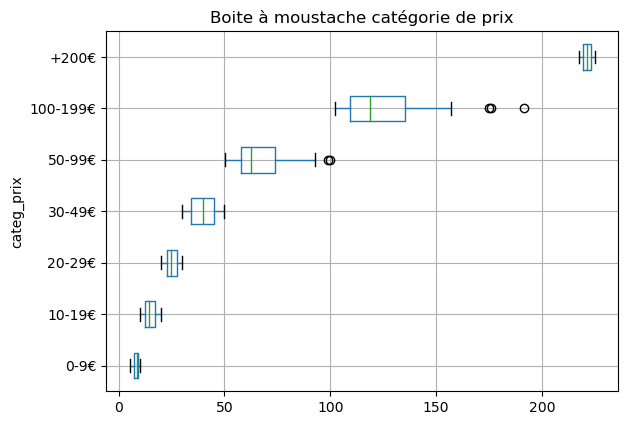

In [246]:
#création de la figure
plt.figure(figsize = (8, 6))
df_merge_vf.boxplot(column='price', by='categ_prix', vert=False)
plt.title('Boite à moustache catégorie de prix')
plt.suptitle('')
plt.show()

In [247]:
#Autre méthode avec plotly express
fig = px.box(df_merge_vf,x='price',y='categ_prix',points='all')
fig.update_layout(title='Boite à moustache plotly',xaxis_title='categ_prix',yaxis_title='price')
fig.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [248]:
#Calculer la moyenne du prix
moyenne_prix = df_merge_vf["price"].mean()

#Calculer l'écart-type du prix
ecart_type_prix = df_merge_vf['price'].std()

print("La moyenne du prix est :", moyenne_prix)
print("L'écart-type du prix est :", ecart_type_prix)


La moyenne du prix est : 32.41563636363637
L'écart-type du prix est : 26.795849199710535


In [249]:
#Calculer le Z-score

df_merge_vf['Z-score_price'] = (df_merge_vf['price'] - moyenne_prix) / ecart_type_prix
print("le Z-score du prix est :", df_merge_vf['Z-score_price'])

df_merge_vf['Z-score_price'].describe()

le Z-score du prix est : 0     -0.306601
1      0.070323
2     -0.433486
3     -0.683525
4      0.506958
         ...   
820    0.469639
821    0.469639
822    0.835367
823   -0.220767
824   -0.601423
Name: Z-score_price, Length: 825, dtype: float64


count    8.250000e+02
mean    -8.612639e-17
std      1.000000e+00
min     -1.015666e+00
25%     -6.648655e-01
50%     -2.991372e-01
75%      3.576809e-01
max      7.187097e+00
Name: Z-score_price, dtype: float64

In [250]:
#Quel est le seuil prix dont z-score est supérieur à 3?
seuil_z_score = 3
prix_outliers = df_merge_vf[df_merge_vf['Z-score_price'] > seuil_z_score]
seuil_prix_outliers = prix_outliers['price'].min()
print("Le seuil de prix dont le Z-score est supérieur à 3 est :", seuil_prix_outliers)


Le seuil de prix dont le Z-score est supérieur à 3 est : 114.0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [251]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_merge_vf["price"].describe()

count    825.000000
mean      32.415636
std       26.795849
min        5.200000
25%       14.600000
50%       24.400000
75%       42.000000
max      225.000000
Name: price, dtype: float64

In [ ]:
#Définissez un seuil pour les articles "outliers" en prix: 114.0 €


In [252]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
##Définissez le nombre d'articles 
outliers = df_merge_vf[df_merge_vf['Z-score_price'].abs() > seuil_z_score]
print(outliers)
outliers.to_csv('outliers.csv', index=False)


     product_id  onsale_web  price stock_status_2 id_web sku_x  sku_y  \
208        4352           1  225.0     outofstock  15940   NaN  15940   
210        4355           1  126.5        instock  12589   NaN  12589   
227        4402           1  176.0        instock   3510   NaN   3510   
230        4406           1  157.0        instock   7819   NaN   7819   
242        4594           1  144.0     outofstock    NaN   NaN    NaN   
411        4904           1  137.0        instock  14220   NaN  14220   
460        5001           1  217.5        instock  14581   NaN  14581   
556        5612           1  124.8        instock  14915   NaN  14915   
598        5767           1  175.0        instock  15185   NaN  15185   
635        5892           1  191.3        instock  14983   NaN  14983   
651        5917           1  122.0        instock  14775   NaN  14775   
652        5918           1  114.0        instock  14773   NaN  14773   
697        6126           1  135.0        instock  

In [253]:
#Définissez le nombre d'articles "outliers" : 18
## Définissez la proportion de l'ensemble du catalogue "outliers"

proportion_outliers = len(outliers) / len(df_merge_vf)*100

print("Proportion d'outliers :", proportion_outliers, '%')

Proportion d'outliers : 2.181818181818182 %


In [ ]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
##oui,cela se justifie par la qualité du produit(region, domaine, appelation, cepage, millesime, age),validation croisée etc


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA et des quantités vendues</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [254]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article

df_merge_vf['chiffre_affaires'] = df_merge_vf['total_sales'] * df_merge_vf['price']

df_merge_vf['chiffre_affaires'].head()


0    145.2
1      0.0
2      0.0
3     42.3
4      0.0
Name: chiffre_affaires, dtype: float64

In [255]:
#Calculez la somme de la colonne "ca_par_article"
chiffre_affaires_total = df_merge_vf['chiffre_affaires'].sum()
print("Le chiffre d'affaires total est :", chiffre_affaires_total)

Le chiffre d'affaires total est : 70568.6


In [256]:
#Ce résultat correspond au chiffre d'affaire du site web
ventes_en_ligne = df_merge_vf[df_merge_vf['onsale_web'] == 1]
ventes_en_ligne['chiffre_affaires'] = ventes_en_ligne['total_sales'] * ventes_en_ligne['price']

# Calculer le chiffre d'affaires total des ventes en ligne
chiffre_affaires_ventes_en_ligne = ventes_en_ligne['chiffre_affaires'].sum()

# Afficher le chiffre d'affaires total des ventes en ligne
print("Le chiffre d'affaires total des ventes en ligne est :", chiffre_affaires_ventes_en_ligne)

Le chiffre d'affaires total des ventes en ligne est : 70568.6


C:\Users\33666\AppData\Local\Temp\ipykernel_11048\2475394993.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [257]:
## Calculer le chiffre d'affaires total des ventes en ligne(autre méthode)
chiffre_affaires_par_type = df_merge_vf.groupby('onsale_web')['chiffre_affaires'].sum()
print(chiffre_affaires_par_type)

onsale_web
0        0.0
1    70568.6
Name: chiffre_affaires, dtype: float64


In [258]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_merge_vf_trie = df_merge_vf.sort_values(by='chiffre_affaires', ascending=False)

#Réinitialiser l'index du dataset par un reset_index
df_merge_vf_trie = df_merge_vf_trie.reset_index(drop=True)

#Afficher les 20 premier articles en CA

top_20_articles = df_merge_vf_trie.head(20)
print(top_20_articles)


    product_id  onsale_web  price stock_status_2 id_web sku_x  sku_y  \
0         4334           1   49.0     outofstock   7818   NaN   7818   
1         4144           1   49.0        instock   1662   NaN   1662   
2         4402           1  176.0        instock   3510   NaN   3510   
3         4142           1   53.0        instock  11641   NaN  11641   
4         4141           1   39.0        instock    304   NaN    304   
5         4355           1  126.5        instock  12589   NaN  12589   
6         4352           1  225.0     outofstock  15940   NaN  15940   
7         4153           1   29.0     outofstock  16237   NaN  16237   
8         6206           1   25.2        instock  16580   NaN  16580   
9         4068           1   16.6        instock  16416   NaN  16416   
10        4053           1   44.3        instock  13127   NaN  13127   
11        4596           1   43.9     outofstock  15476   NaN  15476   
12        4891           1   27.9     outofstock  15807   NaN  1

In [259]:
#Graphique en barre des 20 premiers articles avec plotly express

fig = px.bar(top_20_articles, x='post_name', y='chiffre_affaires', title='Top 20 des articles en CA')
fig.update_traces(texttemplate='%{y}', textposition='outside', textfont=dict(family="Cambria", size=12, color="black"))
# Augmenter la taille de la figure
fig.update_layout(width=900, height=900)
fig.show()

In [261]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset

df_merge_vf_trie['part_ca'] =df_merge_vf_trie['chiffre_affaires'] / chiffre_affaires_total
df_merge_vf_trie.head()


,product_id,onsale_web,price,stock_status_2,id_web,sku_x,sku_y,total_sales,tax_status,post_author,...,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,categ_prix,Z-score_price,chiffre_affaires,part_ca
0,4334,1,49.0,outofstock,7818,NaN,7818,96.0,taxable,2.0,...,NaN,4 ans,75cl,12%,10°C,"Apéritif, Coquilles Saint Jacques, Huîtres, Po...",30-49€,0.618915,4704.0,0.066659
1,4144,1,49.0,instock,1662,NaN,1662,87.0,taxable,2.0,...,NaN,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons",30-49€,0.618915,4263.0,0.060409
2,4402,1,176.0,instock,3510,NaN,3510,13.0,taxable,2.0,...,NaN,NaN,70cl,40%,NaN,NaN,100-199€,5.358455,2288.0,0.032422
3,4142,1,53.0,instock,11641,NaN,11641,30.0,taxable,2.0,...,2015.0,8-10 ans,75cl,12%,10°C,"Agneau, Apéritif, Fromage de chèvre, Noix de S...",50-99€,0.768192,1590.0,0.022531
4,4141,1,39.0,instock,304,NaN,304,40.0,taxable,2.0,...,NaN,4 ans,75cl,12%,10°C,"Apéritif, Fruits cuits, Sucré-salé, Tajine",30-49€,0.245723,1560.0,0.022106


In [262]:

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée(colonne 'part_ca')

df_merge_vf_trie['somme_cumulative'] = df_merge_vf_trie['part_ca'].cumsum()
df_merge_vf_trie.head()


,product_id,onsale_web,price,stock_status_2,id_web,sku_x,sku_y,total_sales,tax_status,post_author,...,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,categ_prix,Z-score_price,chiffre_affaires,part_ca,somme_cumulative
0,4334,1,49.0,outofstock,7818,NaN,7818,96.0,taxable,2.0,...,4 ans,75cl,12%,10°C,"Apéritif, Coquilles Saint Jacques, Huîtres, Po...",30-49€,0.618915,4704.0,0.066659,0.066659
1,4144,1,49.0,instock,1662,NaN,1662,87.0,taxable,2.0,...,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons",30-49€,0.618915,4263.0,0.060409,0.127068
2,4402,1,176.0,instock,3510,NaN,3510,13.0,taxable,2.0,...,NaN,70cl,40%,NaN,NaN,100-199€,5.358455,2288.0,0.032422,0.159490
3,4142,1,53.0,instock,11641,NaN,11641,30.0,taxable,2.0,...,8-10 ans,75cl,12%,10°C,"Agneau, Apéritif, Fromage de chèvre, Noix de S...",50-99€,0.768192,1590.0,0.022531,0.182021
4,4141,1,39.0,instock,304,NaN,304,40.0,taxable,2.0,...,4 ans,75cl,12%,10°C,"Apéritif, Fruits cuits, Sucré-salé, Tajine",30-49€,0.245723,1560.0,0.022106,0.204128


In [263]:
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA

#### Trouver le nombre d'articles représentant 80% du CA
articles_80_pct_ca  = 0.8
filtered_df = df_merge_vf_trie[df_merge_vf_trie['somme_cumulative'] <= articles_80_pct_ca ]
num_articles = len(filtered_df)

print(f"le nombre d'articles représentant {articles_80_pct_ca  * 100}% du CA : {num_articles}")

le nombre d'articles représentant 80.0% du CA : 130


In [264]:
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
proportion = round((len(filtered_df)/len(df_merge_vf_trie))*100,2)
print("La proportion du catalogue entier du site web représentée par les 80% des articles est :", proportion)


La proportion du catalogue entier du site web représentée par les 80% des articles est : 15.76


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [265]:
###############################
# Palmares des articles en quantité #
###############################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_sorted = df_merge_vf_trie.sort_values(by='total_sales', ascending=False)

df_sorted.head()




,product_id,onsale_web,price,stock_status_2,id_web,sku_x,sku_y,total_sales,tax_status,post_author,...,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,categ_prix,Z-score_price,chiffre_affaires,part_ca,somme_cumulative
0,4334,1,49.0,outofstock,7818,NaN,7818,96.0,taxable,2.0,...,4 ans,75cl,12%,10°C,"Apéritif, Coquilles Saint Jacques, Huîtres, Po...",30-49€,0.618915,4704.0,0.066659,0.066659
1,4144,1,49.0,instock,1662,NaN,1662,87.0,taxable,2.0,...,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons",30-49€,0.618915,4263.0,0.060409,0.127068
9,4068,1,16.6,instock,16416,NaN,16416,62.0,taxable,2.0,...,3-5 ans,75cl,"13,5%",15°C,"Apéritif, Charcuterie, Viande rouge, Volaille",10-19€,-0.590227,1029.2,0.014584,0.283808
50,4200,1,5.8,instock,16295,NaN,16295,46.0,taxable,2.0,...,2 ans,75cl,12%,11°C,"Apéritif, Grillades, Légumes croquants, Salade",0-9€,-0.993275,266.8,0.003781,0.591857
57,4172,1,5.7,instock,16210,NaN,16210,43.0,taxable,2.0,...,3 ans,75cl,"12,50%",11°C,"Apéritif, Poissons, Volaille",0-9€,-0.997007,245.1,0.003473,0.616854


In [267]:
#Réinitialiser l'index du dataset par un reset_index
df_merge_final = df_sorted.reset_index(drop=True)
df_merge_final.head()


,product_id,onsale_web,price,stock_status_2,id_web,sku_x,sku_y,total_sales,tax_status,post_author,...,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,categ_prix,Z-score_price,chiffre_affaires,part_ca,somme_cumulative
0,4334,1,49.0,outofstock,7818,NaN,7818,96.0,taxable,2.0,...,4 ans,75cl,12%,10°C,"Apéritif, Coquilles Saint Jacques, Huîtres, Po...",30-49€,0.618915,4704.0,0.066659,0.066659
1,4144,1,49.0,instock,1662,NaN,1662,87.0,taxable,2.0,...,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons",30-49€,0.618915,4263.0,0.060409,0.127068
2,4068,1,16.6,instock,16416,NaN,16416,62.0,taxable,2.0,...,3-5 ans,75cl,"13,5%",15°C,"Apéritif, Charcuterie, Viande rouge, Volaille",10-19€,-0.590227,1029.2,0.014584,0.283808
3,4200,1,5.8,instock,16295,NaN,16295,46.0,taxable,2.0,...,2 ans,75cl,12%,11°C,"Apéritif, Grillades, Légumes croquants, Salade",0-9€,-0.993275,266.8,0.003781,0.591857
4,4172,1,5.7,instock,16210,NaN,16210,43.0,taxable,2.0,...,3 ans,75cl,"12,50%",11°C,"Apéritif, Poissons, Volaille",0-9€,-0.997007,245.1,0.003473,0.616854


In [268]:
#Afficher les 20 premier articles en quantité
premiers_articles = df_merge_final.head(20)
print(premiers_articles)



    product_id  onsale_web  price stock_status_2 id_web sku_x  sku_y  \
0         4334           1   49.0     outofstock   7818   NaN   7818   
1         4144           1   49.0        instock   1662   NaN   1662   
2         4068           1   16.6        instock  16416   NaN  16416   
3         4200           1    5.8        instock  16295   NaN  16295   
4         4172           1    5.7        instock  16210   NaN  16210   
5         4187           1   13.3        instock  16189   NaN  16189   
6         6206           1   25.2        instock  16580   NaN  16580   
7         4141           1   39.0        instock    304   NaN    304   
8         4729           1    8.6        instock     38   NaN     38   
9         6047           1   10.9        instock  16264   NaN  16264   
10        6207           1   25.2        instock  16077   NaN  16077   
11        4891           1   27.9     outofstock  15807   NaN  15807   
12        4153           1   29.0     outofstock  16237   NaN  1

In [269]:
#Graphique en barre des 20 premiers articles avec plotly express

fig = px.bar(premiers_articles, x='post_name', y='total_sales', title='Top 20 des articles en quantité vendue')
fig.update_traces(texttemplate='%{y}', textposition='outside', textfont=dict(family="Cambria", size=12, color="black"))

# Augmenter la taille de la figure
fig.update_layout(width=900, height=900)
fig.show()

In [270]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
somme_totale_quantites = df_merge_final['total_sales'].sum()

# Créer la nouvelle colonne pour la part en quantité
df_merge_final['part_quantite'] = df_merge_final['total_sales'] / somme_totale_quantites


df_merge_final.head()




,product_id,onsale_web,price,stock_status_2,id_web,sku_x,sku_y,total_sales,tax_status,post_author,...,Contenance,Degré d'alcool,Température dégustation,Alliance mets,categ_prix,Z-score_price,chiffre_affaires,part_ca,somme_cumulative,part_quantite
0,4334,1,49.0,outofstock,7818,NaN,7818,96.0,taxable,2.0,...,75cl,12%,10°C,"Apéritif, Coquilles Saint Jacques, Huîtres, Po...",30-49€,0.618915,4704.0,0.066659,0.066659,0.033508
1,4144,1,49.0,instock,1662,NaN,1662,87.0,taxable,2.0,...,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons",30-49€,0.618915,4263.0,0.060409,0.127068,0.030366
2,4068,1,16.6,instock,16416,NaN,16416,62.0,taxable,2.0,...,75cl,"13,5%",15°C,"Apéritif, Charcuterie, Viande rouge, Volaille",10-19€,-0.590227,1029.2,0.014584,0.283808,0.021640
3,4200,1,5.8,instock,16295,NaN,16295,46.0,taxable,2.0,...,75cl,12%,11°C,"Apéritif, Grillades, Légumes croquants, Salade",0-9€,-0.993275,266.8,0.003781,0.591857,0.016056
4,4172,1,5.7,instock,16210,NaN,16210,43.0,taxable,2.0,...,75cl,"12,50%",11°C,"Apéritif, Poissons, Volaille",0-9€,-0.997007,245.1,0.003473,0.616854,0.015009


In [271]:
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée

df_merge_final['somme_cumulative_2'] = df_merge_final['part_quantite'].cumsum()
df_merge_final.head()

,product_id,onsale_web,price,stock_status_2,id_web,sku_x,sku_y,total_sales,tax_status,post_author,...,Degré d'alcool,Température dégustation,Alliance mets,categ_prix,Z-score_price,chiffre_affaires,part_ca,somme_cumulative,part_quantite,somme_cumulative_2
0,4334,1,49.0,outofstock,7818,NaN,7818,96.0,taxable,2.0,...,12%,10°C,"Apéritif, Coquilles Saint Jacques, Huîtres, Po...",30-49€,0.618915,4704.0,0.066659,0.066659,0.033508,0.033508
1,4144,1,49.0,instock,1662,NaN,1662,87.0,taxable,2.0,...,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons",30-49€,0.618915,4263.0,0.060409,0.127068,0.030366,0.063874
2,4068,1,16.6,instock,16416,NaN,16416,62.0,taxable,2.0,...,"13,5%",15°C,"Apéritif, Charcuterie, Viande rouge, Volaille",10-19€,-0.590227,1029.2,0.014584,0.283808,0.021640,0.085515
3,4200,1,5.8,instock,16295,NaN,16295,46.0,taxable,2.0,...,12%,11°C,"Apéritif, Grillades, Légumes croquants, Salade",0-9€,-0.993275,266.8,0.003781,0.591857,0.016056,0.101571
4,4172,1,5.7,instock,16210,NaN,16210,43.0,taxable,2.0,...,"12,50%",11°C,"Apéritif, Poissons, Volaille",0-9€,-0.997007,245.1,0.003473,0.616854,0.015009,0.116579


In [272]:
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité

articles_80_pct_pq  = 0.8
filtered_df = df_merge_final[df_merge_final['somme_cumulative_2'] <= articles_80_pct_pq ]
num_articles = len(filtered_df)

print(f"le nombre d'articles représentant {articles_80_pct_ca  * 100}% des ventes : {num_articles}")

le nombre d'articles représentant 80.0% des ventes : 150


In [273]:
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
proportion = round((len(filtered_df)/len(df_merge_final))*100,2)
print("La proportion du catalogue entier du site web représentée par les 80% des articles est :", proportion)

La proportion du catalogue entier du site web représentée par les 80% des articles est : 18.18


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [274]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  
df_merge_final.to_csv('df_merge_final.csv', index=False)